<a href="https://colab.research.google.com/github/rishiphatak/housing-prices-google-colab/blob/master/Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Housing Price Prediction

In [1]:
path_to_file = '/content/sample_data/california_housing_test.csv'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [3]:
df = pd.read_csv(path_to_file)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0
...,...,...,...,...,...,...,...,...,...
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708,162500.0


In [4]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

## Use simple Linear Regression with Polynomial Features

In [6]:
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)

In [7]:
linreg = LinearRegression().fit(X_poly_train, y_train)
linreg.score(X_poly_train, y_train)

0.695228304921885

In [8]:
X_test_poly = poly.transform(X_test)
linreg.score(X_test_poly, y_test)

0.6159718343718295

## Use a Neural Network for Regression

In [ ]:
import tensorflow as tf

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [ ]:
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Dense(64, input_shape=(8,)),
                                    tf.keras.layers.Dense(64, activation='relu'),
                                    tf.keras.layers.Dense(64, activation='relu'),
                                    tf.keras.layers.Dense(1)
])
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-2, momentum=0.9), loss='mse')
history = model.fit(X_train_scaled, y_train, epochs=500, verbose=0)

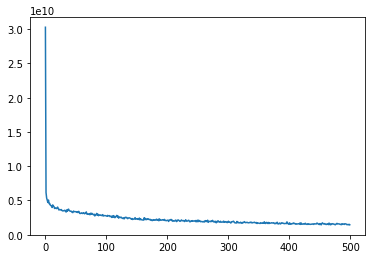

In [ ]:
plt.plot(history.history['loss'])

In [ ]:
r2_score(y_train, model.predict(X_train_scaled))

0.9007105198953764

In [ ]:
X_test_scaled = scaler.transform(X_test)
r2_score(y_test, model.predict(X_test_scaled))

0.6823950234937766

## Use RandomForestRegressor

In [9]:
from sklearn.ensemble import RandomForestRegressor

In [18]:
reg = RandomForestRegressor().fit(X_train, y_train)
reg.score(X_train, y_train)

0.9627214821091213

In [19]:
reg.score(X_test, y_test)

0.7238561530889548